## Recommendation Model
- Creating a simple recommentation model that suggests the top 10 similar recipes to a recipe

### Part 1)
- Recommendation model

### Part 2)
- Similarity matrix for recommended recipes


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk, string
nltk.download('punkt') # if necessary...

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robert.lowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('recipes_info.csv')

In [4]:
df = df.replace(np.nan, '')

In [5]:
df['All']=df['country'].astype(str)+' '+df['dish_category']+' '+df['dish_type']+' '+df['carbohydrate_category']+' '+df['protein'] +' '+df['spice_level'] +' '+df['protein_type']

In [6]:
df.head(3)

,recipe_id,country,country_secondary,dish_category,dish_type,diet_type,carbohydrate_base,carbohydrate_category,protein,protein_cut,protein_type,family_friendly,spice_level,prep_time,All
0,2,India,India,Stove top / bowl food,Curry,Fish,Basmati,Rice,Shellfish,Prawns,Fish & Seafood,No,No Spice,25,India Stove top / bowl food Curry Rice Shellfi...
1,5,Italy,Italy,Protein&Veg,Meat & Side veg,Meat,white potatoes,Potato,Beans,Butter beans,Pulses,No,Mild,35,Italy Protein&Veg Meat & Side veg Potato Beans...
2,9,Thailand,Thailand,Stove top / bowl food,Curry,Vegan,Basmati,Rice,Tofu,Protein not found,Vegetarian,No,Spicy,25,Thailand Stove top / bowl food Curry Rice Tofu...


In [7]:
recipes = df.iloc[:,-1].tolist()
recipes[0:10]

['India Stove top / bowl food Curry Rice Shellfish No Spice Fish & Seafood',
 'Italy Protein&Veg Meat & Side veg Potato Beans Mild Pulses',
 'Thailand Stove top / bowl food Curry Rice Tofu Spicy Vegetarian',
 'Great Britain Protein&Veg Fish & side veg  Oily Fish No Spice Fish & Seafood',
 'Tunisia Protein&Veg Egg dish Grains Eggs No Spice Dairy & Eggs',
 'Tunisia Protein&Veg Cheese & Side veg Grains Cheese No Spice Dairy & Eggs',
 'Italy Stove top / bowl food Pasta Pasta Cheese No Spice Dairy & Eggs',
 'Lebanon Salads Tabbouleh Grains Cheese No Spice Dairy & Eggs',
 'Italy Stove top / bowl food Risotto Rice  No Spice ',
 'Japan Soups Ramen Noodles Chicken No Spice Poultry & Meat']

In [8]:
# List of content
corpus = df.iloc[:,-1].tolist()

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.30742369 ... 0.03768635 0.30447059 0.16750479]
 [0.         1.         0.         ... 0.         0.10151791 0.27706535]
 [0.30742369 0.         1.         ... 0.         0.22393116 0.22944018]
 ...
 [0.03768635 0.         0.         ... 1.         0.25089659 0.        ]
 [0.30447059 0.10151791 0.22393116 ... 0.25089659 1.         0.18440045]
 [0.16750479 0.27706535 0.22944018 ... 0.         0.18440045 1.        ]]


___
#### Observation of what each recipe has in common

___

In [11]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
Tfidf_Vectorizer = TfidfVectorizer(stop_words='english')
Tfidf_Vectorizer = TfidfVectorizer()
sparse_matrix = Tfidf_Vectorizer.fit_transform(corpus)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
recipes = pd.DataFrame(doc_term_matrix, 
                  columns=Tfidf_Vectorizer.get_feature_names(), 
                  index=df.iloc[:,0].tolist())
recipes.head().to_clipboard()
recipes.head()

,african,america,and,armenia,austria,bake,bbq,beans,beef,bowl,...,tunisia,turkey,ukraine,united,usa,veg,vegetarian,vietnam,whitefish,wraps
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.207202,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398285,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.488307,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.183423,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.485207,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.327997,0.000000,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.46693,0.0,0.0,0.0,0.0,0.184332,0.000000,0.0,0.0,0.0


In [13]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(corpus)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
recipes = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=df.iloc[:,0].tolist())
recipes.head().to_clipboard()
recipes.head()

,african,america,and,armenia,austria,bake,bbq,beans,beef,bowl,...,tunisia,turkey,ukraine,united,usa,veg,vegetarian,vietnam,whitefish,wraps
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


___
#### 2) Recommendation model

- Recommending top 10 recipes to 'recipe_id'

___

In [34]:
def recipe_recommender(recipe_id):
    indices = pd.Series(df.index)

    # initializing the empty list of recommended recipes
    recommended_recipes = []
    
    # gettin the index of the recipe that matches the recipe_id
    idx = indices[indices == recipe_id].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # creating a dataframe that shows the similarity score
    scores = pd.concat([score_series],axis =1 ).reset_index().rename(
                                                 columns = {0 :'Similarity_scores to: {}'.format(recipe_id)}).iloc[0:11]
    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[0:11].index)

    # populating the list with the recipe_ids of the best 10 matching recipes
    for i in top_10_indexes:
        recommended_recipes.append(list(df.index)[i])

    # create a dataframe (merge similarity score)             
    recommended = df[df.index.isin(recommended_recipes)]
    recommended['index'] = recommended.index
    recommended['recipe_id_dup'] = recommended['recipe_id']
    recommended = pd.merge(recommended, scores, on=['index'], how='inner')
    
    return recommended.sort_values(by='Similarity_scores to: {}'.format(recipe_id), ascending=False)




In [35]:
recipe_recommender(2)

,recipe_id,country,country_secondary,dish_category,dish_type,diet_type,carbohydrate_base,carbohydrate_category,protein,protein_cut,protein_type,family_friendly,spice_level,prep_time,All,index,recipe_id_dup,Similarity_scores to: 2
0,9,Thailand,Thailand,Stove top / bowl food,Curry,Vegan,Basmati,Rice,Tofu,Protein not found,Vegetarian,No,Spicy,25,Thailand Stove top / bowl food Curry Rice Tofu...,2,9,1.000000
2,271,Japan,Japan,Stove top / bowl food,Curry,Vegan,Basmati,Rice,Tofu,,Vegetarian,No,No Spice,30,Japan Stove top / bowl food Curry Rice Tofu No...,40,271,0.771523
8,1086,Thailand,Thailand,Stove top / bowl food,Curry,Vegan,Basmati,Rice,,Protein not found,,No,Spicy,30,Thailand Stove top / bowl food Curry Rice Spicy,197,1086,0.727426
6,945,Thailand,Thailand,Stove top / bowl food,Curry,Meat,Basmati,Rice,Chicken,Breast Chicken,Poultry & Meat,No,Spicy,30,Thailand Stove top / bowl food Curry Rice Chic...,188,945,0.653364
3,364,Japan,Japan,Stove top / bowl food,Stir Fry,Vegetarian,Basmati,Rice,Tofu,,Vegetarian,No,No Spice,40,Japan Stove top / bowl food Stir Fry Rice Tofu...,79,364,0.626470
10,1098,Thailand,Thailand,Stove top / bowl food,Curry,Meat,Basmati,Rice,Chicken,Breast Chicken,Poultry & Meat,Yes,No Spice,30,Thailand Stove top / bowl food Curry Rice Chic...,203,1098,0.578606
7,980,India,India,Stove top / bowl food,Curry,Meat,Basmati,Rice,Chicken,Breast Chicken,Poultry & Meat,Yes,Spicy,20-25,India Stove top / bowl food Curry Rice Chicken...,196,980,0.460622
1,58,Japan,Japan,Soups,Ramen,Vegan,Wholewheat noodle nests,Noodles,Tofu,,Vegetarian,No,No Spice,30,Japan Soups Ramen Noodles Tofu No Spice Vegeta...,10,58,0.440700
5,550,India,India,Stove top / bowl food,Curry,Vegetarian,Bulgur wheat,Grains,,Protein not found,,No,Spicy,35,India Stove top / bowl food Curry Grains Spicy,155,550,0.433571
4,470,India,India,Stove top / bowl food,Curry,Vegetarian,Basmati,Rice,,Protein not found,,No,No Spice,30,India Stove top / bowl food Curry Rice No Spice,123,470,0.429821


___
#### Using previous code to create a pairwise dataframe and then create a similarity matrix
- Visualise using heatmap

___

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    recipe1, recipe2 = pair
   
    # split on _ and get index
    recipe1_index = int(recipe1.split("_")[1])
    recipe2_index = int(recipe2.split("_")[1])
    
    # get the detail of the document
    recipe1_detail = recipes[recipe1_index]
    recipe2_detail = recipes[recipe2_index]
    
    corpus = [recipe1_detail,recipe2_detail]

    tfidf_matrix = vectorizer.fit_transform(corpus)
    cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

    return cosine_sim[0][1]

In [49]:
def visualising_the_recommended_recipes(recipe_id):
    df1 = recipe_recommender(recipe_id)
    recipes = df1.iloc[:,-4].tolist()
    num_recipes =len(recipes)
    
    # label recipes as recipeid1_1, recipeid_2 .. recipeid_n
    recipeids = ["RecipeID" + str(i) for i in df1.iloc[:,0].tolist()]
    print(recipeids)
    index_ids = ["_" + str(i) for i in range(num_recipes)]
    print(index_ids)


    d = pd.DataFrame({'recipeids': recipeids, 'index_ids': index_ids})
    #concat two columns
    d['All']=d['recipeids'].astype(str)+' '+d['index_ids']

    #recipeid list
    recipeids = d['All'].tolist()

    # create a dictionary
    recipe_dict = dict(zip(recipeids, recipes))

    # get all the book ids in a list
    ids = list(recipe_dict.keys())

    # create all possible pairs
    pairs = []
    # create a list of tuples
    for i, v in enumerate(ids):
        for j in ids[i+1:]:
            pairs.append((ids[i], j))


    # calculate the feature matrix
    vectorizer = TfidfVectorizer()
    feature_matrix = vectorizer.fit_transform(recipes)
    pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

    # create a dataframe
    data = pd.DataFrame({'Recipe_IDs': pairs, 'Cosine_similarity': pairwise_cosine_similarity})

    # split recipe ides into two columns
    data['Recipe_IDs'] = data['Recipe_IDs'].astype(np.str)
    data[['Recipe_a','Recipe_b']] = data.Recipe_IDs.str.split(",",expand=True,)

    # clean values
    data['Recipe_a'] = data['Recipe_a'].str.replace("'", "")
    data['Recipe_a'] = data['Recipe_a'].str.replace("(", "")
    data['Recipe_b'] = data['Recipe_b'].str.replace("'", "")
    data['Recipe_b'] = data['Recipe_b'].str.replace(")", "")

    # extract recipe ids
    data['b'] = data['Recipe_b'].apply(lambda x : re.findall(r'\d+', x)[0])
    data['a'] = data['Recipe_a'].apply(lambda x : re.findall(r'\d+', x)[0])

    # preview
    data = data.sort_values(by = 'Cosine_similarity', ascending=False)

    # Duplicate tables and apend to create a data set for matrix
    data2 = data[['a', 'b', 'Cosine_similarity']]
    data1 = data[['a', 'b', 'Cosine_similarity']]
    data1.rename(columns={'a': 'bb'}, inplace=True)
    data1.rename(columns={'b': 'a'}, inplace=True)
    data1.rename(columns={'bb': 'b'}, inplace=True)
    data3 = data1.append(data2)

    table1 = pd.pivot_table(data3, index = ['a'], columns = ['b'],
                           values = ['Cosine_similarity'], aggfunc ={'Cosine_similarity':min}).rename(columns ={'Cosine_similarity':'recipe_id'} )
    table1
    import seaborn as sn
    fig_dims = (12, 8)
    fig, ax = plt.subplots(figsize=fig_dims)

    heat = sn.heatmap(table1, annot=True)
    ax.set_ylim(len(table1)+0.005, 0)
    fig = heat.get_figure()

    fig.savefig('sim_matrix.png', dpi=300,bbox_inches='tight')

['RecipeID9', 'RecipeID271', 'RecipeID1086', 'RecipeID945', 'RecipeID364', 'RecipeID1098', 'RecipeID980', 'RecipeID58', 'RecipeID550', 'RecipeID470', 'RecipeID1096']
['_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']


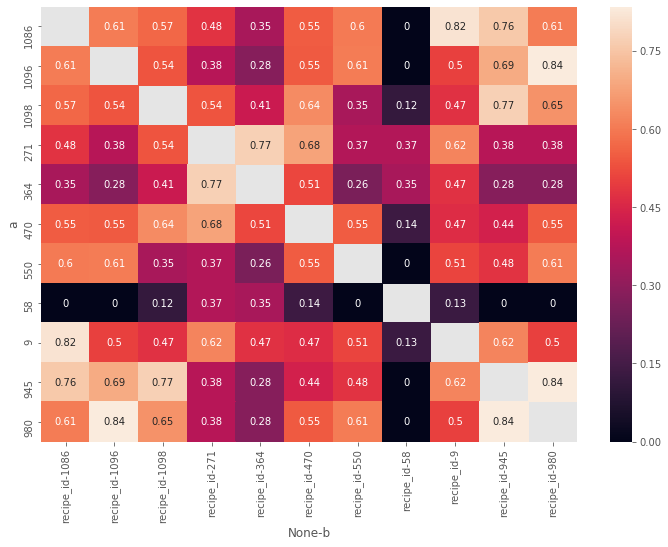

In [50]:
visualising_the_recommended_recipes(2)